In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm, decomposition, tree
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

import torch

import pickle

import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_norm = pd.read_excel('data_norm.xlsx')
data_norm.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
data_norm.shape

(1000, 13)

#### Датасет с входными параметрами (выходные параметры исключены)

In [3]:
data = data_norm.drop(columns=['Модуль_упругости_при_растяжении_ГПа',
                            'Прочность_при_растяжении_МПа',
                            'Соотношение_матрица_наполнитель'], axis=1)
data.shape

(1000, 10)

# Линейная регрессия
### Прогнозирование модуля упругости при растяжении

In [6]:
y_mu = data_norm['Модуль_упругости_при_растяжении_ГПа']
x_train_mu, x_test_mu, y_train_mu, y_test_mu = train_test_split(data, y_mu, test_size=0.3)
x_train_mu.shape, x_test_mu.shape, y_train_mu.shape, y_test_mu.shape

((700, 10), (300, 10), (700,), (300,))

#### Выбор лучших гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой

In [7]:
linear_model_mu = LinearRegression()
param_lm = {'fit_intercept': ['True', 'False'],
             'positive': ['True', 'False']
             }
GS_lm_mu = GridSearchCV(estimator=linear_model_mu, param_grid=param_lm, cv=10).fit(x_train_mu, y_train_mu)
best_lm_mu = GS_lm_mu.best_estimator_
print('Лучшая модель: ', best_lm_mu)
print('Coefficient of determination: %.2f' %best_lm_mu.score(x_test_mu, y_test_mu))

Лучшая модель:  LinearRegression(fit_intercept='True', positive='True')
Coefficient of determination: -0.01


In [8]:
linear_model_mu = LinearRegression(fit_intercept='True', positive='True').fit(x_train_mu, y_train_mu)
y_pred_mu = linear_model_mu.predict(x_test_mu)
print('Mean squared error: %.2f' % mean_squared_error(y_test_mu, y_pred_mu))
print('Coefficient of determination: %.2f' % r2_score(y_test_mu, y_pred_mu))
scoring_table_mu = pd.DataFrame(data=[['Линейная регрессия', mean_squared_error(y_test_mu, y_pred_mu), r2_score(y_test_mu, y_pred_mu)]],
                                columns=['Model', 'MSE', 'R2'])

Mean squared error: 0.03
Coefficient of determination: -0.01


### Прогнозирование прочности при растяжении

In [10]:
y_pr = data_norm['Прочность_при_растяжении_МПа']
x_train_pr, x_test_pr, y_train_pr, y_test_pr = train_test_split(data, y_pr, test_size=0.3)
x_train_pr.shape, x_test_pr.shape, y_train_pr.shape, y_test_pr.shape

((700, 10), (300, 10), (700,), (300,))

#### Выбор лучших гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой

In [11]:
linear_model_pr = LinearRegression()
param_lm = {'fit_intercept': ['True', 'False'],
             'positive': ['True', 'False']
             }
GS_lm_pr = GridSearchCV(estimator=linear_model_pr, param_grid=param_lm, cv=10).fit(x_train_pr, y_train_pr)
best_lm_pr = GS_lm_pr.best_estimator_
print('Лучшая модель: ', best_lm_pr)
print('Coefficient of determination: %.2f' %best_lm_pr.score(x_test_pr, y_test_pr))

Лучшая модель:  LinearRegression(fit_intercept='True', positive='True')
Coefficient of determination: -0.00


In [12]:
linear_model_pr = LinearRegression(fit_intercept='True', positive='True').fit(x_train_pr, y_train_pr)
y_pred_pr = linear_model_pr.predict(x_test_pr)
print('Mean squared error: %.2f' % mean_squared_error(y_test_pr, y_pred_pr))
print('Coefficient of determination: %.2f' % r2_score(y_test_pr, y_pred_pr))
scoring_table_pr = pd.DataFrame(data=[['Линейная регрессия', mean_squared_error(y_test_pr, y_pred_pr), r2_score(y_test_pr, y_pred_pr)]],
                                columns=['Model', 'MSE', 'R2'])

Mean squared error: 0.03
Coefficient of determination: -0.00


### Визуализация на примере модели с 1 параметром

Mean squared error: 0.03
Coefficient of determination: -0.00


(0.0, 1.0)

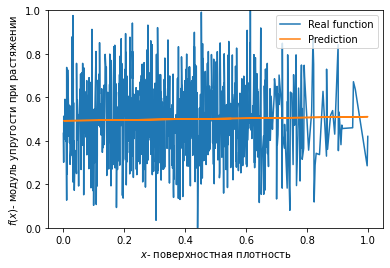

In [13]:
data1 = data_norm[['Поверхностная_плотность_г_м2', 'Модуль_упругости_при_растяжении_ГПа']]
sorted_data1 = data1.sort_values(by='Поверхностная_плотность_г_м2')

X = np.array(sorted_data1['Поверхностная_плотность_г_м2']).reshape(-1, 1) 
y = np.array(sorted_data1['Модуль_упругости_при_растяжении_ГПа'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

regr = LinearRegression(fit_intercept='True', positive='True').fit(x_train, y_train)
y_pred = regr.predict(x_test)
    
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

fig, ax = plt.subplots()
ax.plot(X, y, label="Real function")
ax.plot(x_test, y_pred, label="Prediction")
ax.legend()
ax.set_xlabel("$x$- поверхностная плотность")
ax.set_ylabel("$f(x)$- модуль упругости при растяжении")
ax.set_ylim(0, 1)

### Линейная модель по 1 параметру с преобразованием данных в виде многочлена

Degree: 2
Mean squared error: 0.03
Coefficient of determination: -0.02
Degree: 5
Mean squared error: 0.03
Coefficient of determination: -0.03
Degree: 10
Mean squared error: 0.03
Coefficient of determination: -0.03


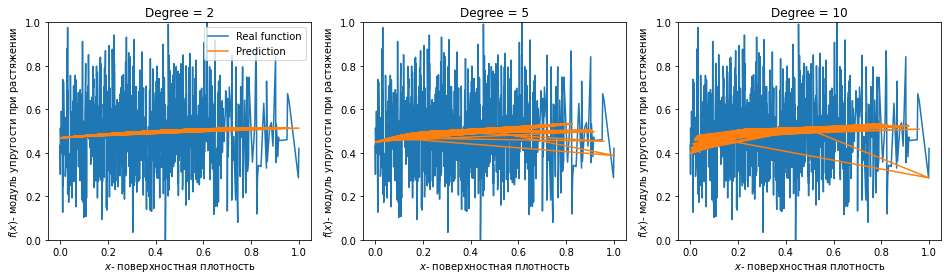

In [14]:
data1 = data_norm[['Поверхностная_плотность_г_м2', 'Модуль_упругости_при_растяжении_ГПа']]
sorted_data1 = data1.sort_values(by='Поверхностная_плотность_г_м2')

X = np.array(sorted_data1['Поверхностная_плотность_г_м2']).reshape(-1, 1) 
y = np.array(sorted_data1['Модуль_упругости_при_растяжении_ГПа'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
for i, degree in enumerate([2, 5, 10]):
    X_objects = PolynomialFeatures(degree, include_bias=False).fit_transform(x_train)
    x = PolynomialFeatures(degree, include_bias=False).fit_transform(x_test)
    regr = LinearRegression().fit(X_objects, y_train)
    y_pred = regr.predict(x)
    
    print('Degree: %d' % degree)
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
   
    axs[i].plot(X, y, label="Real function")
    axs[i].plot(x_test, y_pred, label="Prediction")
    if i == 0:
        axs[i].legend()
    axs[i].set_title("Degree = %d" % degree)
    axs[i].set_xlabel("$x$- поверхностная плотность")
    axs[i].set_ylabel("$f(x)$- модуль упругости при растяжении")
    axs[i].set_ylim(0, 1)

### Линейная модель по всем параметрам с преобразованием данных в виде многочлена
#### Прогноз модуля упругости при растяжении

In [15]:
X_poly_mu = PolynomialFeatures(2).fit_transform(x_train_mu)
x_poly_mu = PolynomialFeatures(2).fit_transform(x_test_mu)

linear_model_mu_Poly = LinearRegression(fit_intercept='True', positive='True').fit(X_poly_mu, y_train_mu)
y_pred_mu_Poly = linear_model_mu_Poly.predict(x_poly_mu)
print('Mean squared error: %.2f' % mean_squared_error(y_test_mu, y_pred_mu_Poly))
print('Coefficient of determination: %.2f' % r2_score(y_test_mu, y_pred_mu_Poly))
scoring_table_mu = scoring_table_mu.append({'Model': 'Линейная регрессия с полиномом^2',
                                            'MSE': mean_squared_error(y_test_mu, y_pred_mu_Poly),
                                            'R2': r2_score(y_test_mu, y_pred_mu_Poly)}, ignore_index=True)

Mean squared error: 0.03
Coefficient of determination: -0.01


#### Прогноз прочности при растяжении

In [17]:
X_poly_pr = PolynomialFeatures(2).fit_transform(x_train_pr)
x_poly_pr = PolynomialFeatures(2).fit_transform(x_test_pr)

linear_model_pr_Poly = LinearRegression(fit_intercept='True', positive='True').fit(X_poly_pr, y_train_pr)
y_pred_pr_Poly = linear_model_pr_Poly.predict(x_poly_pr)
print('Mean squared error: %.2f' % mean_squared_error(y_test_pr, y_pred_pr_Poly))
print('Coefficient of determination: %.2f' % r2_score(y_test_pr, y_pred_pr_Poly))
scoring_table_pr = scoring_table_pr.append({'Model': 'Линейная регрессия с полиномом^2',
                                            'MSE': mean_squared_error(y_test_pr, y_pred_pr_Poly),
                                            'R2': r2_score(y_test_pr, y_pred_pr_Poly)}, ignore_index=True)

Mean squared error: 0.03
Coefficient of determination: 0.00


### Линейная модель по всем параметрам с преобразованием данных в виде многочлена, учитывается только взаимодействие признаков
#### Прогноз модуля упругости при растяжении

In [18]:
X_interact_mu = PolynomialFeatures(2, interaction_only=True).fit_transform(x_train_mu)
x_interact_mu = PolynomialFeatures(2, interaction_only=True).fit_transform(x_test_mu)

linear_model_mu_Interact = LinearRegression(fit_intercept='True', positive='True').fit(X_interact_mu, y_train_mu)
y_pred_mu_Interact = linear_model_mu_Interact.predict(x_interact_mu)
print('Mean squared error: %.2f' % mean_squared_error(y_test_mu, y_pred_mu_Interact))
print('Coefficient of determination: %.2f' % r2_score(y_test_mu, y_pred_mu_Interact))
scoring_table_mu = scoring_table_mu.append({'Model': 'Лин.регр. с полиномом^2 (только взаимодей.)',
                                            'MSE': mean_squared_error(y_test_mu, y_pred_mu_Interact),
                                            'R2': r2_score(y_test_mu, y_pred_mu_Interact)}, ignore_index=True)

Mean squared error: 0.03
Coefficient of determination: -0.01


#### Прогноз прочности при растяжении

In [19]:
X_interact_pr = PolynomialFeatures(2, interaction_only=True).fit_transform(x_train_pr)
x_interact_pr = PolynomialFeatures(2, interaction_only=True).fit_transform(x_test_pr)

linear_model_pr_Interact = LinearRegression(fit_intercept='True', positive='True').fit(X_interact_pr, y_train_pr)
y_pred_pr_Interact = linear_model_pr_Interact.predict(x_interact_mu)
print('Mean squared error: %.2f' % mean_squared_error(y_test_pr, y_pred_pr_Interact))
print('Coefficient of determination: %.2f' % r2_score(y_test_pr, y_pred_pr_Interact))
scoring_table_pr = scoring_table_pr.append({'Model': 'Лин.регр. с полиномом^2 (только взаимодей.)',
                                            'MSE': mean_squared_error(y_test_pr, y_pred_pr_Interact),
                                            'R2': r2_score(y_test_pr, y_pred_pr_Interact)}, ignore_index=True)

Mean squared error: 0.03
Coefficient of determination: -0.00


___

# DecisionTreeRegressor
### Прогнозирование модуля упругости при растяжении с подбором гиперпараметров

In [20]:
tree_regr_mu = DecisionTreeRegressor()
param_tree = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter': ['best', 'random'],
              'max_depth': [2, 3, 4, 5],
              'min_samples_split': [1, 2, 3, 4],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, 0.01, 0.001]
             }
GS_tree_mu = GridSearchCV(estimator=tree_regr_mu, param_grid=param_tree, cv=10).fit(x_train_mu, y_train_mu)
best_tree_mu = GS_tree_mu.best_estimator_
print('Лучшая модель: ', best_tree_mu)
print('Coefficient of determination: %.2f' %best_tree_mu.score(x_test_mu, y_test_mu))

Лучшая модель:  DecisionTreeRegressor(ccp_alpha=0.001, criterion='absolute_error', max_depth=4,
                      max_features='log2', min_samples_leaf=4,
                      splitter='random')
Coefficient of determination: -0.01


Mean squared error: 0.03
Coefficient of determination: -0.01


[Text(0.5, 0.5, 'absolute_error = 0.132\nsamples = 700\nvalue = 0.489')]

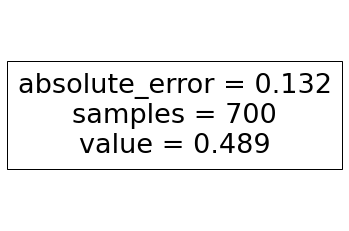

In [36]:
tree_regr_mu = DecisionTreeRegressor(ccp_alpha=0.001, criterion='absolute_error', max_depth=4,
                                      max_features='log2', min_samples_leaf=4,
                                      splitter='random').fit(x_train_mu, y_train_mu)
y_pred_mu = tree_regr_mu.predict(x_test_mu)
print('Mean squared error: %.2f' % mean_squared_error(y_test_mu, y_pred_mu))
print('Coefficient of determination: %.2f' % r2_score(y_test_mu, y_pred_mu))

scoring_table_mu = scoring_table_mu.append({'Model': 'Регрессия дерева решений',
                                            'MSE': mean_squared_error(y_test_mu, y_pred_mu),
                                            'R2': r2_score(y_test_mu, y_pred_mu)}, ignore_index=True)

tree.plot_tree(tree_regr_mu, filled = True)

### Прогнозирование прочности при растяжении с подбором гиперпараметров

In [22]:
tree_regr_pr = DecisionTreeRegressor()
param_tree = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter': ['best', 'random'],
              'max_depth': [2, 3, 4, 5],
              'min_samples_split': [1, 2, 3, 4],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, 0.01, 0.001]
             }
GS_tree_pr = GridSearchCV(estimator=tree_regr_pr, param_grid=param_tree, cv=10).fit(x_train_pr, y_train_pr)
best_tree_pr = GS_tree_pr.best_estimator_
print('Лучшая модель: ', best_tree_pr)
print('Coefficient of determination: %.2f' %best_tree_pr.score(x_test_pr, y_test_pr))

Лучшая модель:  DecisionTreeRegressor(ccp_alpha=0.001, criterion='absolute_error', max_depth=4,
                      max_features='auto', splitter='random')
Coefficient of determination: -0.00


Mean squared error: 0.03
Coefficient of determination: -0.00


[Text(0.5, 0.5, 'absolute_error = 0.136\nsamples = 700\nvalue = 0.507')]

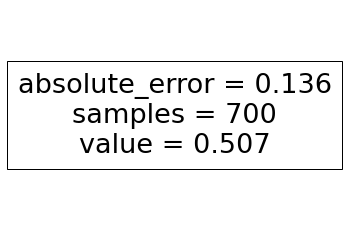

In [37]:
tree_regr_pr = DecisionTreeRegressor(ccp_alpha=0.001, criterion='absolute_error', max_depth=4,
                                    max_features='auto', splitter='random').fit(x_train_pr, y_train_pr)
y_pred_pr = tree_regr_pr.predict(x_test_pr)
print('Mean squared error: %.2f' % mean_squared_error(y_test_pr, y_pred_pr))
print('Coefficient of determination: %.2f' % r2_score(y_test_pr, y_pred_pr))

scoring_table_pr = scoring_table_pr.append({'Model': 'Регрессия дерева решений',
                                            'MSE': mean_squared_error(y_test_pr, y_pred_pr),
                                            'R2': r2_score(y_test_pr, y_pred_pr)}, ignore_index=True)

tree.plot_tree(tree_regr_pr, filled = True)

___

# Регрессия лассо
### Прогнозирование модуля упругости при растяжении¶

In [38]:
lasso_mu = LassoCV(n_alphas=100, alphas=[0.1, 1, 10], fit_intercept=True, cv=10).fit(x_train_mu, y_train_mu)
y_pred_mu = lasso_mu.predict(x_test_mu)
print('Mean squared error: %.2f' % mean_squared_error(y_test_mu, y_pred_mu))
print('Coefficient of determination: %.2f' % r2_score(y_test_mu, y_pred_mu))

scoring_table_mu = scoring_table_mu.append({'Model': 'Регрессия лассо',
                                            'MSE': mean_squared_error(y_test_mu, y_pred_mu),
                                            'R2': r2_score(y_test_mu, y_pred_mu)}, ignore_index=True)

Mean squared error: 0.03
Coefficient of determination: -0.00


### Прогнозирование прочности при растяжении

In [39]:
lasso_pr = LassoCV(n_alphas=100, alphas=[0.1, 1, 10], fit_intercept=True, cv=10).fit(x_train_pr, y_train_pr)
y_pred_pr = lasso_pr.predict(x_test_pr)
print('Mean squared error: %.2f' % mean_squared_error(y_test_pr, y_pred_pr))
print('Coefficient of determination: %.2f' % r2_score(y_test_pr, y_pred_pr))

scoring_table_pr = scoring_table_pr.append({'Model': 'Регрессия лассо',
                                            'MSE': mean_squared_error(y_test_pr, y_pred_pr),
                                            'R2': r2_score(y_test_pr, y_pred_pr)}, ignore_index=True)

Mean squared error: 0.03
Coefficient of determination: -0.00


___

# SV-regression
### Прогнозирование модуля упругости при растяжении с подбором гиперпараметров¶

In [26]:
sv_regr_mu = svm.SVR()
param_svr = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': [2, 3, 4, 5, 6],
             'gamma': ['scale', 'auto'],
             'C': [0.1, 0.2, 0.5, 1.0],
             'epsilon': [0.1, 0.2]}
GS_svr_mu = GridSearchCV(estimator=sv_regr_mu, param_grid=param_svr, cv=10).fit(x_train_mu, y_train_mu)
best_svr_mu = GS_svr_mu.best_estimator_
print('Лучшая модель: ', best_svr_mu)
print('Coefficient of determination: %.2f' %best_svr_mu.score(x_test_mu, y_test_mu))

Лучшая модель:  SVR(C=0.2, degree=2, gamma='auto', kernel='sigmoid')
Coefficient of determination: -0.02


In [40]:
sv_regr_mu = svm.SVR(C=0.2, degree=2, gamma='auto', kernel='sigmoid').fit(x_train_mu, y_train_mu)
y_pred_mu = sv_regr_mu.predict(x_test_mu)
print('Mean squared error: %.2f' % mean_squared_error(y_test_mu, y_pred_mu))
print('Coefficient of determination: %.2f' % r2_score(y_test_mu, y_pred_mu))

scoring_table_mu = scoring_table_mu.append({'Model': 'Регрессия метода опорных векторов',
                                            'MSE': mean_squared_error(y_test_mu, y_pred_mu),
                                            'R2': r2_score(y_test_mu, y_pred_mu)}, ignore_index=True)

Mean squared error: 0.03
Coefficient of determination: -0.02


### Прогнозирование прочности при растяжении с подбором гиперпараметров

In [28]:
sv_regr_pr = svm.SVR()
param_svr = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': [2, 3, 4, 5, 6],
             'gamma': ['scale', 'auto'],
             'C': [0.1, 0.2, 0.5, 1.0],
             'epsilon': [0.1, 0.2]}
GS_svr_pr = GridSearchCV(estimator=sv_regr_pr, param_grid=param_svr, cv=10).fit(x_train_pr, y_train_pr)
best_svr_pr = GS_svr_pr.best_estimator_
print('Лучшая модель: ', best_svr_pr)
print('Coefficient of determination: %.2f' %best_svr_pr.score(x_test_pr, y_test_pr))

Лучшая модель:  SVR(C=0.1, degree=2, gamma='auto', kernel='poly')
Coefficient of determination: 0.00


In [43]:
sv_regr_pr = svm.SVR(C=0.1, degree=2, gamma='auto', kernel='poly').fit(x_train_pr, y_train_pr)
y_pred_pr = sv_regr_pr.predict(x_test_pr)
print('Mean squared error: %.2f' % mean_squared_error(y_test_pr, y_pred_pr))
print('Coefficient of determination: %.2f' % r2_score(y_test_pr, y_pred_pr))

scoring_table_pr = scoring_table_pr.append({'Model': 'Регрессия метода опорных векторов',
                                            'MSE': mean_squared_error(y_test_pr, y_pred_pr),
                                            'R2': r2_score(y_test_pr, y_pred_pr)}, ignore_index=True)

Mean squared error: 0.03
Coefficient of determination: 0.00


___

# Метрики построенных моделей
### Прогнозирование модуля упругости при растяжении

In [41]:
scoring_table_mu

,Model,MSE,R2
0,Линейная регрессия,0.030016,-0.013819
1,Линейная регрессия с полиномом^2,0.030005,-0.013459
2,Лин.регр. с полиномом^2 (только взаимодей.),0.029983,-0.012703
3,Регрессия дерева решений,0.029865,-0.008703
4,Регрессия лассо,0.029718,-0.003750
5,Регрессия метода опорных векторов,0.030227,-0.020952


### Прогнозирование прочности при растяжении

In [44]:
scoring_table_pr

,Model,MSE,R2
0,Линейная регрессия,0.028917,-0.001463
1,Линейная регрессия с полиномом^2,0.028852,0.000808
2,Лин.регр. с полиномом^2 (только взаимодей.),0.028930,-0.001904
3,Регрессия дерева решений,0.028876,-0.000038
4,Регрессия лассо,0.028883,-0.000290
5,Регрессия метода опорных векторов,0.028749,0.004371


___

Поскольку все модели неудовлетворительного качества, сохраняем повледнюю в качестве примера для разработки приложения

In [32]:
pickle.dump(sv_regr_mu, open('model_svr.pkl', 'wb'))